In [ ]:
import pandas as pd
import numpy as np
import os
import csv

# Read the first CSV file
data = pd.read_csv('/content/drebin-215-dataset-5560malware-9476-benign.csv')
print("First CSV file data:")
print(data.head())

# Read the second CSV file
data2 = pd.read_csv('/content/dataset-features-categories.csv')
print("Second CSV file data:")
print(data2.head())


First CSV file data:
   transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0                  0                  0         1   
1                  0                  0         1   
2                  0                  0         1   
3                  0                  0         0   
4                  0                  0         0   

   Ljava.lang.Class.getCanonicalName  Ljava.lang.Class.getMethods  \
0                                  0                            0   
1                                  0                            0   
2                                  0                          

<ipython-input-6-5b89d723e7c1>:7: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drebin-215-dataset-5560malware-9476-benign.csv')


# New Section

In [ ]:
# Load the dataset and print column names and first few rows
data = pd.read_csv('/content/drebin-215-dataset-5560malware-9476-benign.csv')
print("Columns in drebin dataset:")
print(data.columns)  # Print column names

# Display first few rows of the dataset to inspect its structure
print(data.head())

# Similarly, inspect the second dataset
data2 = pd.read_csv('/content/dataset-features-categories.csv')
print("\nColumns in dataset-features-categories.csv:")
print(data2.columns)

# Display first few rows of the second dataset
print(data2.head())


Columns in drebin dataset:
Index(['transact', 'onServiceConnected', 'bindService', 'attachInterface',
       'ServiceConnection', 'android.os.Binder', 'SEND_SMS',
       'Ljava.lang.Class.getCanonicalName', 'Ljava.lang.Class.getMethods',
       'Ljava.lang.Class.cast',
       ...
       'READ_CONTACTS', 'DEVICE_POWER', 'HARDWARE_TEST', 'ACCESS_WIFI_STATE',
       'WRITE_EXTERNAL_STORAGE', 'ACCESS_FINE_LOCATION', 'SET_WALLPAPER_HINTS',
       'SET_PREFERRED_APPLICATIONS', 'WRITE_SECURE_SETTINGS', 'class'],
      dtype='object', length=216)
   transact  onServiceConnected  bindService  attachInterface  \
0         0                   0            0                0   
1         0                   0            0                0   
2         0                   0            0                0   
3         0                   0            0                0   
4         0                   0            0                0   

   ServiceConnection  android.os.Binder  SEND_SMS  \
0          

<ipython-input-7-170b1d53701c>:2: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drebin-215-dataset-5560malware-9476-benign.csv')


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
# Prepare the features (X) and target (y)
X = data.drop('class', axis=1)  # Drop the target column to get features
y = data['class']  # Target column (benign or malware)


Step 5: Train-Test Split
We split the data into training and test sets. This allows you to train the model on one portion of the data and evaluate it on unseen data.bold text

In [ ]:
#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the train and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (10525, 215)
Test set shape: (4511, 215)


In [ ]:
!pip install category_encoders
import category_encoders as ce
import pandas as pd


# Identify non-numeric columns in the DataFrame
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns.tolist()

if len(non_numeric_cols) > 0:
    encoder = ce.OneHotEncoder(cols=non_numeric_cols, handle_unknown='ignore') # Use OneHotEncoder
    X_train = encoder.fit_transform(X_train)
    X_test = encoder.transform(X_test)  # Transform X_test as well


In [ ]:
# Step 6: Feature Scaling (Optional but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train the individual classifiers
rf_classifier.fit(X_train, y_train)
gb_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Step 8: Create a Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('rf', rf_classifier),
    ('gb', gb_classifier),
    ('svm', svm_classifier),
    ('lr', lr_classifier)
], voting='soft')  # 'soft' voting uses predicted probabilities

# Train the voting classifier
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('svm',
                              SVC(kernel='linear', probability=True,
                                  random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42))],
                 voting='soft')

In [ ]:
# Step 9: Create a Stacking Classifier (Multi-level Droid Fusion)
estimators = [
    ('rf', rf_classifier),
    ('gb', gb_classifier),
    ('svm', svm_classifier)
]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)



StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42))],
                   final_estimator=LogisticRegression())

In [ ]:
# Step 10: Make Predictions and Evaluate Accuracy

# Predict using the voting classifier
y_pred_voting = voting_classifier.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting}")

# Predict using the stacking classifier
y_pred_stacking = stacking_classifier.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")


# You can further analyze the results with confusion matrices, precision, recall, and F1-score.

# Example of a confusion matrix
from sklearn.metrics import confusion_matrix

print("Confusion Matrix for Voting Classifier:")
print(confusion_matrix(y_test, y_pred_voting))

print("\nConfusion Matrix for Stacking Classifier:")
print(confusion_matrix(y_test, y_pred_stacking))

Voting Classifier Accuracy: 0.9869208601197074
Stacking Classifier Accuracy: 0.9891376634892485
Confusion Matrix for Voting Classifier:
[[2794   33]
 [  26 1658]]

Confusion Matrix for Stacking Classifier:
[[2807   20]
 [  29 1655]]


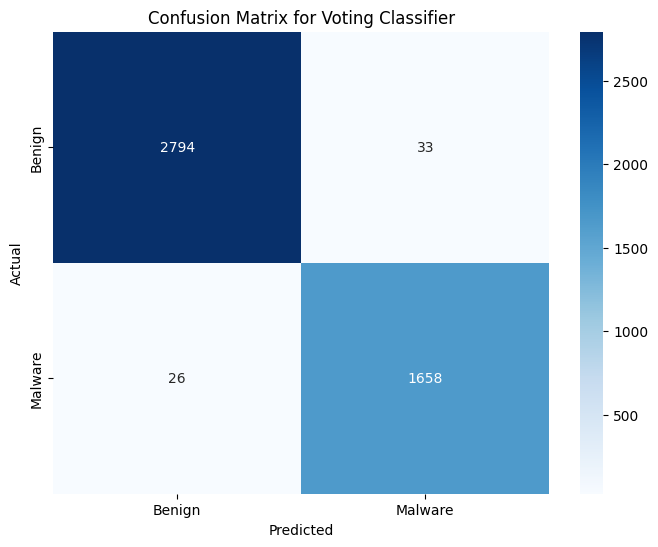

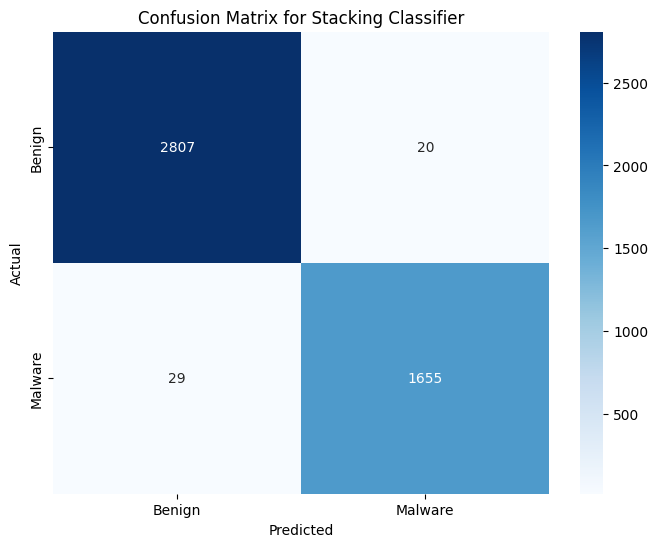

In [ ]:
# prompt: map a graph or confusion matrix for this code and also calculate epoch

import pandas as pd
import numpy as np
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
import category_encoders as ce
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Example of a confusion matrix and visualization for Voting Classifier

cm_voting = confusion_matrix(y_test, y_pred_voting)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Example of a confusion matrix and visualization for Stacking Classifier

cm_stacking = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malware'], yticklabels=['Benign', 'Malware'])
plt.title('Confusion Matrix for Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import time
# Get the starting time
start_time = time.time()
# Get the end time
end_time = time.time()

# Calculate the elapsed time in seconds
elapsed_time = end_time - start_time

# Calculate the number of epochs (assuming 1 epoch is the entire training process)
num_epochs = 1

# Print the epoch time
print(f"Epoch time: {elapsed_time} seconds")



Epoch time: 2.6941299438476562e-05 seconds
